# PYTHON PROJECT - LIVER PATIENT
## Priyanka Pathak - 42 - 220962276
## Svadha Dey - 80 - 220962450

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
# Allows graphs to be displayed in the notebook itself

from sklearn.impute import SimpleImputer
# To remove  null values
from sklearn.preprocessing import LabelEncoder
# The LabelEncoder is a utility class in scikit-learn used for encoding categorical labels with numerical values.
# It is used to convert categorical text data into a numerical format.

In [2]:
# reading the data from the file
liver_df = pd.read_csv('indian_liver_patient.csv')

In [3]:
# displaying the first few rows of the dataset
liver_df.head()

,AGE,GENDER,TOTAL_BILIRUBIN,DIRECT_BILIRUBIN,ALKALINE_PHOSPHOTASE,ALAMINE_AMINOTRANSFERASE,ASPARTATE_AMINOTRANSFERASE,TOTAL_PROTEINS,ALBUMIN,ALBUMIN_AND_GLOBULIN_RATIO,LABEL
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver_df.info()
# This method gives a short summary of the DataFrame
# non-null means the  non-missing values in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGE                         583 non-null    int64  
 1   GENDER                      583 non-null    object 
 2   TOTAL_BILIRUBIN             583 non-null    float64
 3   DIRECT_BILIRUBIN            583 non-null    float64
 4   ALKALINE_PHOSPHOTASE        583 non-null    int64  
 5   ALAMINE_AMINOTRANSFERASE    583 non-null    int64  
 6   ASPARTATE_AMINOTRANSFERASE  583 non-null    int64  
 7   TOTAL_PROTEINS              583 non-null    float64
 8   ALBUMIN                     583 non-null    float64
 9   ALBUMIN_AND_GLOBULIN_RATIO  579 non-null    float64
 10  LABEL                       583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
# Generating information about numerical columns in the dataset
liver_df.describe()
# To include all generated information about numerical and non-numrical
liver_df.describe(include='all')

,AGE,GENDER,TOTAL_BILIRUBIN,DIRECT_BILIRUBIN,ALKALINE_PHOSPHOTASE,ALAMINE_AMINOTRANSFERASE,ASPARTATE_AMINOTRANSFERASE,TOTAL_PROTEINS,ALBUMIN,ALBUMIN_AND_GLOBULIN_RATIO,LABEL
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [6]:
# Prints the information available in the dataset
liver_df.columns

Index(['AGE', 'GENDER', 'TOTAL_BILIRUBIN', 'DIRECT_BILIRUBIN',
       'ALKALINE_PHOSPHOTASE', 'ALAMINE_AMINOTRANSFERASE',
       'ASPARTATE_AMINOTRANSFERASE', 'TOTAL_PROTEINS', 'ALBUMIN',
       'ALBUMIN_AND_GLOBULIN_RATIO', 'LABEL'],
      dtype='object')

# Cleaning Data
cleaning done later by dropping rows with missing values from training and testing dataset

In [56]:
# Checks for any null values
liver_df.isnull().sum()

AGE                           0
TOTAL_BILIRUBIN               0
DIRECT_BILIRUBIN              0
ALKALINE_PHOSPHOTASE          0
ALAMINE_AMINOTRANSFERASE      0
ASPARTATE_AMINOTRANSFERASE    0
TOTAL_PROTEINS                0
ALBUMIN                       0
ALBUMIN_AND_GLOBULIN_RATIO    4
LABEL                         0
GENDER_Female                 0
GENDER_Male                   0
dtype: int64

# COUNT PLOTS:

In [8]:
# 1. Diagnosed with liver disease or not
# 2. Males and females

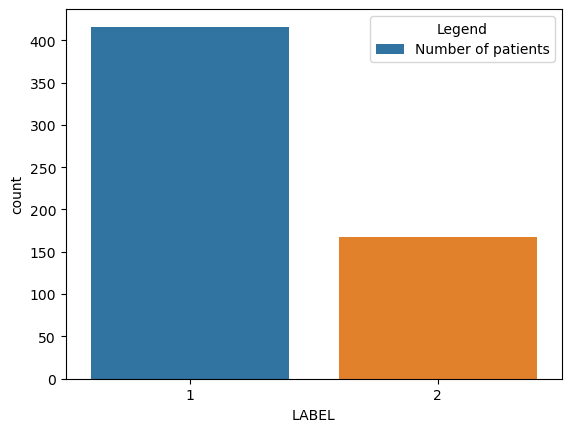

Count of patients diagnosed with liver disease:  416
Count of patients not diagnosed with liver disease:  167


In [9]:
sns.countplot(data=liver_df, x='LABEL')

# Adds a legend with a title
plt.legend(labels=['Number of patients'], title='Legend')

# Displays the plot
plt.show()

# Displays the count of patients with and without liver disease
LD, NLD = liver_df['LABEL'].value_counts()
print('Count of patients diagnosed with liver disease: ', LD)
print('Count of patients not diagnosed with liver disease: ', NLD)

Count of male patients:  441
Count of female patients:  142


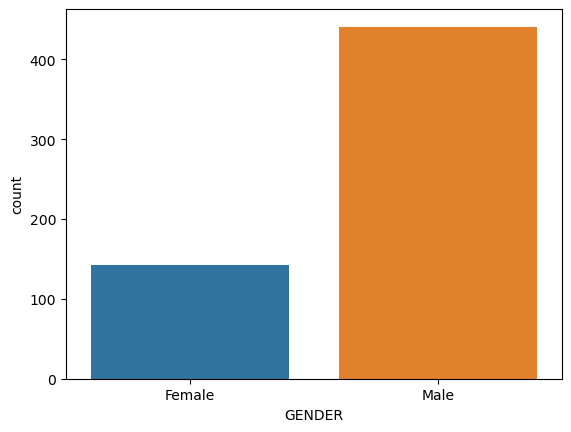

In [10]:
sns.countplot(data=liver_df, x = 'GENDER', label='COUNT')

M, F = liver_df['GENDER'].value_counts()
print('Count of male patients: ',M)
print('Count of female patients: ',F)

In [11]:
liver_df[['GENDER','LABEL','AGE']].groupby(['LABEL','GENDER'], as_index=False).count().sort_values(by='LABEL', ascending=False)
# 1. Groups the original DataFrame by 'LABEL' and 'GENDER'
# 2. Calculates the count for each group
# 3. Sorts the result based on the 'LABEL' column in descending order
# 4. Selects specific columns for display. 
# 5. The resulting DataFrame provides information about the count for each combination of 'LABEL' and 'GENDER'.

,LABEL,GENDER,AGE
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [12]:
liver_df[['GENDER','LABEL','AGE']].groupby(['LABEL','GENDER'], as_index=False).mean().sort_values(by='LABEL', ascending=False)
# 1. Groups the original DataFrame by 'LABEL' and 'GENDER'
# 2. Calculates the mean age for each group
# 3. Sorts the result based on the 'LABEL' column in descending order
# 4. Selects specific columns for display. 
# 5. The resulting DataFrame provides information about the mean age for each combination of 'LABEL' and 'GENDER'.

,LABEL,GENDER,AGE
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


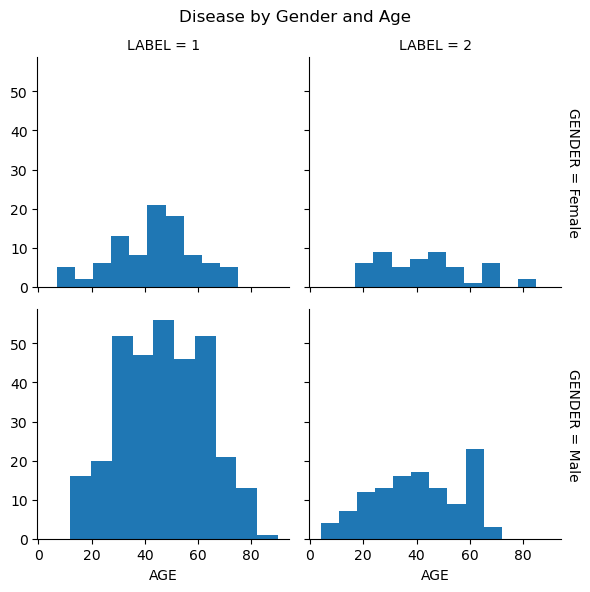

In [13]:
g = sns.FacetGrid(liver_df, col="LABEL", row="GENDER", margin_titles=True)
g.map(plt.hist, "AGE")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

# FINDING CORRELATIONS BETWEEN DIFFERENT FEATURES

 __1. DIRECT_BILIRUBIN and TOTAL_BILIRUBIN__
    
 __2. ALAMINE_AMINOTRANSFERASE and ASPARTATE_AMINOTRANSFERASE__

 __3. TOTAL_PROTEINS and ALBUMIN__
    
 __4. ALBUMIN_AND_GLOBULIN_RATIO & ALBUMIN__

 __5. ALBUMIN_AND_GLOBULIN_RATIO & TOTAL_PROTEINS__
    
 __6. ALKALINE_PHOSPHOTASE and ALAMINE_AMINOTRANSFERASE__

# 1. DIRECT_BILIRUBIN and TOTAL_BILIRUBIN

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


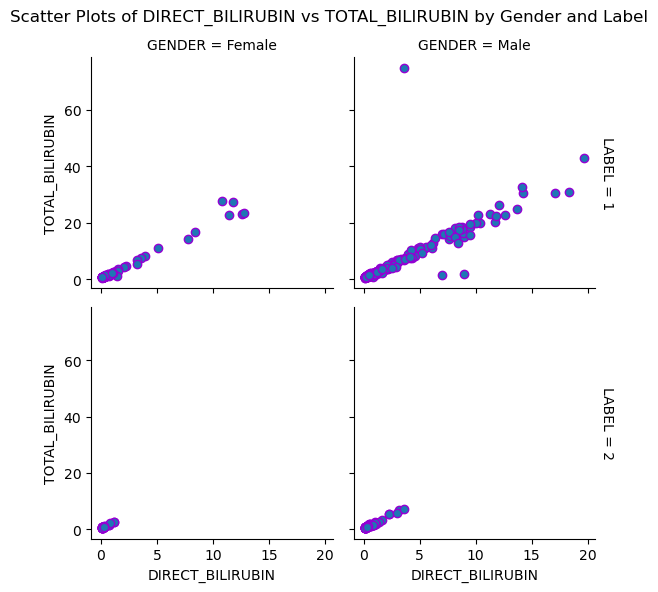

In [14]:
# Creating a FacetGrid
# FacetGrid is a visualization tool provided by Seaborn.
# Used for creating a grid of subplots for one or more categorical variables.
g = sns.FacetGrid(data=liver_df, col="GENDER", row="LABEL", margin_titles=True)
# Mapping scatter plots to each grid element
g.map(plt.scatter, "DIRECT_BILIRUBIN", "TOTAL_BILIRUBIN", edgecolor="darkviolet")
# Adjusting the subplot layout
plt.subplots_adjust(top=0.9)
# Title
g.fig.suptitle('Scatter Plots of DIRECT_BILIRUBIN vs TOTAL_BILIRUBIN by Gender and Label')
# Displaying the plot
plt.show()

In [15]:
# There is a correlation between DIRECT_BILIRUBIN and TOTAL_BILIRUBIN. 

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


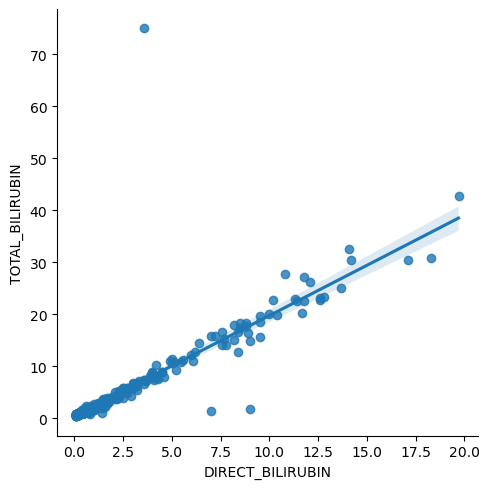

In [16]:
# Creating a scatter plot with regression line using Seaborn's linear model plot
sns.lmplot(x="DIRECT_BILIRUBIN", y="TOTAL_BILIRUBIN", data=liver_df)
# Displaying the plot
plt.show()

# 2. ALAMINE_AMINOTRANSFERASE and ASPARTATE_AMINOTRANSFERASE

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


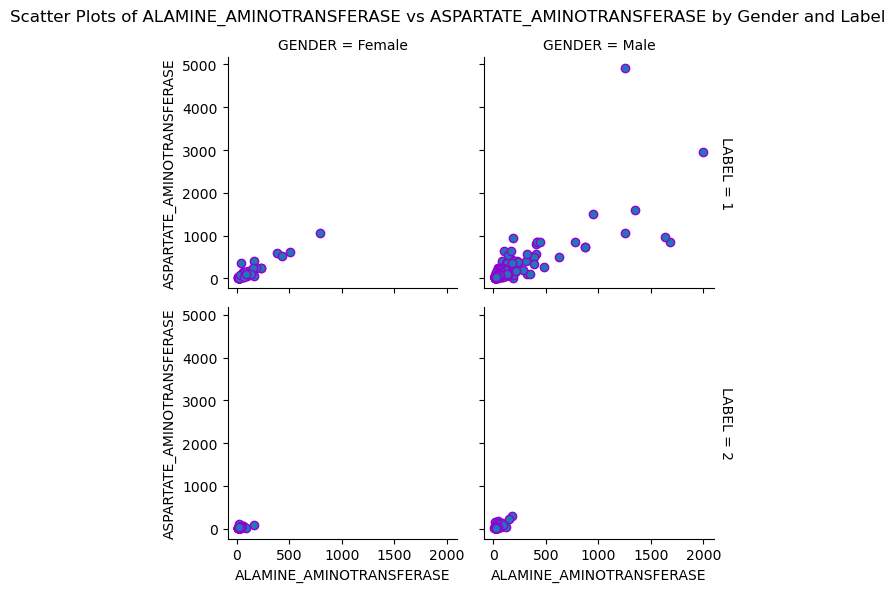

In [17]:
# Creating a FacetGrid
g = sns.FacetGrid(data=liver_df, col="GENDER", row="LABEL", margin_titles=True)
# Mapping scatter plots to each grid element
g.map(plt.scatter, "ALAMINE_AMINOTRANSFERASE", "ASPARTATE_AMINOTRANSFERASE", edgecolor="darkviolet")
# Adjusting the subplot layout
plt.subplots_adjust(top=0.9)
# Title
g.fig.suptitle('Scatter Plots of ALAMINE_AMINOTRANSFERASE vs ASPARTATE_AMINOTRANSFERASE by Gender and Label')
# Displaying the plot
plt.show()

In [18]:
# There is a correlation between ALAMINE_AMINOTRANSFERASE and ASPARTATE_AMINOTRANSFERASE and the GENDER.

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


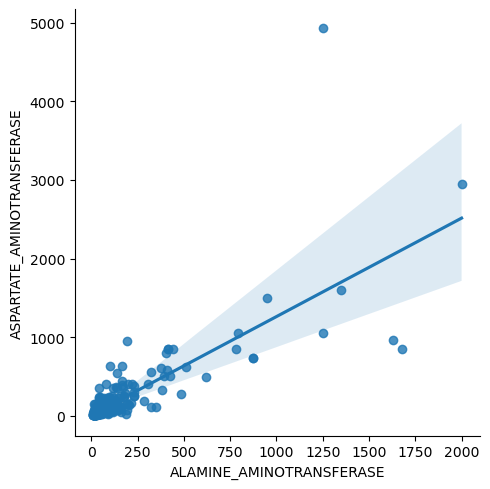

In [19]:
# Creating a scatter plot with regression line using Seaborn's linear model plot
sns.lmplot(x="ALAMINE_AMINOTRANSFERASE", y="ASPARTATE_AMINOTRANSFERASE", data=liver_df)
# Displaying the plot
plt.show()

# 3. TOTAL_PROTEINS and ALBUMIN 

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


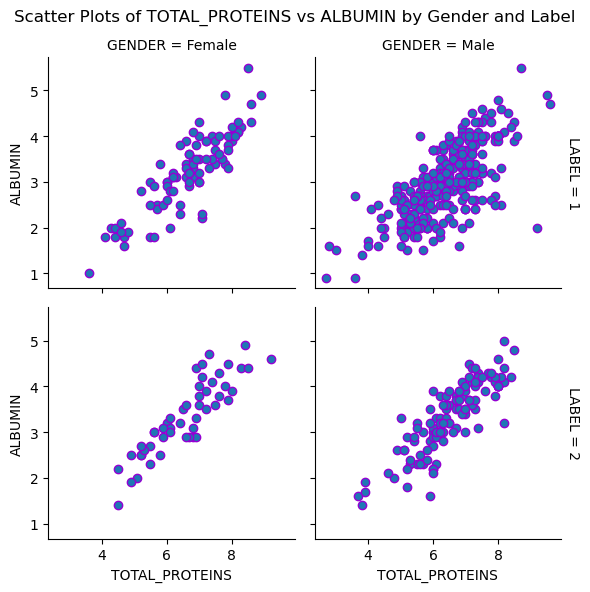

In [20]:
# Creating a FacetGrid
g = sns.FacetGrid(data=liver_df, col="GENDER", row="LABEL", margin_titles=True)
# Mapping scatter plots to each grid element
g.map(plt.scatter, "TOTAL_PROTEINS", "ALBUMIN", edgecolor="darkviolet")
# Adjusting the subplot layout
plt.subplots_adjust(top=0.9)
# Title
g.fig.suptitle('Scatter Plots of TOTAL_PROTEINS vs ALBUMIN by Gender and Label')
# Displaying the plot
plt.show()

In [21]:
#There is a correlation between TOTAL_PROTEINS and ALBUMIN. 

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


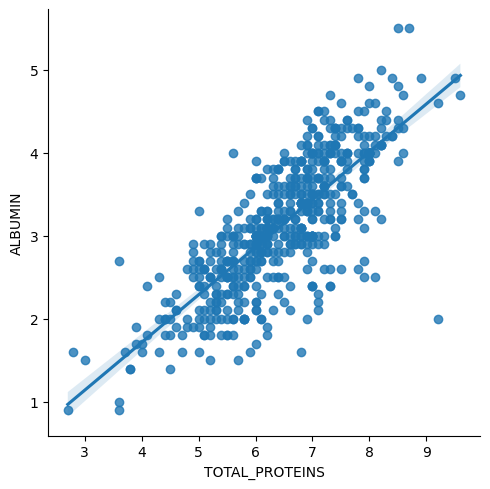

In [22]:
# Creating a scatter plot with regression line using Seaborn's linear model plot
sns.lmplot(x="TOTAL_PROTEINS", y="ALBUMIN", data=liver_df)
# Displaying the plot
plt.show()

# 4. ALBUMIN_AND_GLOBULIN_RATIO & ALBUMIN 

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


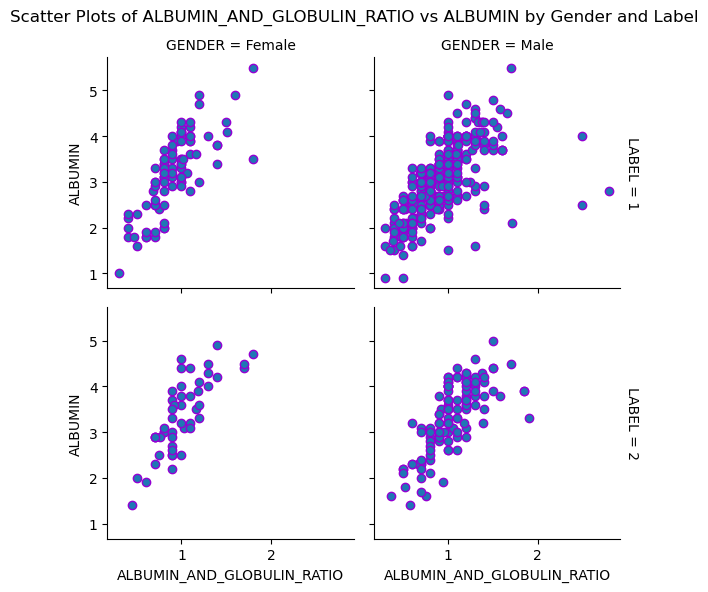

In [23]:
# Creating a FacetGrid
g = sns.FacetGrid(data=liver_df, col="GENDER", row="LABEL", margin_titles=True)
# Mapping scatter plots to each grid element
g.map(plt.scatter, "ALBUMIN_AND_GLOBULIN_RATIO", "ALBUMIN", edgecolor="darkviolet")
# Adjusting the subplot layout
plt.subplots_adjust(top=0.9)
# Title
g.fig.suptitle('Scatter Plots of ALBUMIN_AND_GLOBULIN_RATIO vs ALBUMIN by Gender and Label')
# Displaying the plot
plt.show()

In [24]:
#There is a correlation between ALBUMIN_AND_GLOBULIN_RATIO and ALBUMIN. 

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


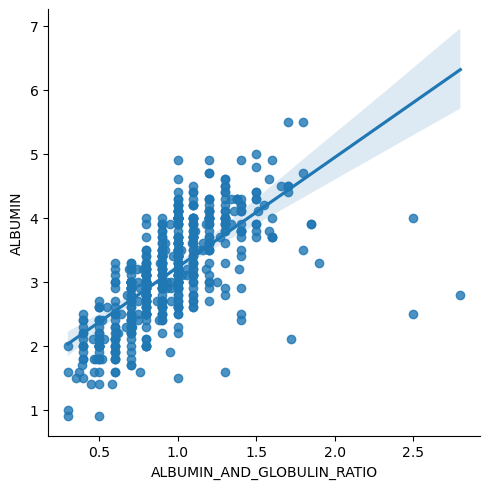

In [25]:
# Creating a scatter plot with regression line using Seaborn's linear model plot
sns.lmplot(x="ALBUMIN_AND_GLOBULIN_RATIO", y="ALBUMIN", data=liver_df)
# Displaying the plot
plt.show()

# 5. ALBUMIN_AND_GLOBULIN_RATIO & TOTAL_PROTEINS 

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


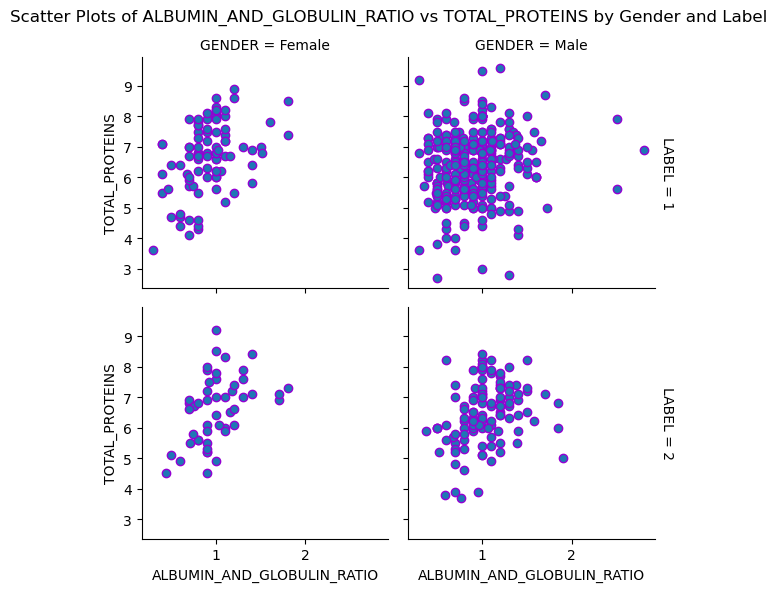

In [26]:
# Creating a FacetGrid
g = sns.FacetGrid(data=liver_df, col="GENDER", row="LABEL", margin_titles=True)
# Mapping scatter plots to each grid element
g.map(plt.scatter, "ALBUMIN_AND_GLOBULIN_RATIO", "TOTAL_PROTEINS", edgecolor="darkviolet")
# Adjusting the subplot layout
plt.subplots_adjust(top=0.9)
# Title
g.fig.suptitle('Scatter Plots of ALBUMIN_AND_GLOBULIN_RATIO vs TOTAL_PROTEINS by Gender and Label')
# Displaying the plot
plt.show()

In [27]:
#There is a correlation between ALBUMIN_AND_GLOBULIN_RATIO and TOTAL_PROTEINS.

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


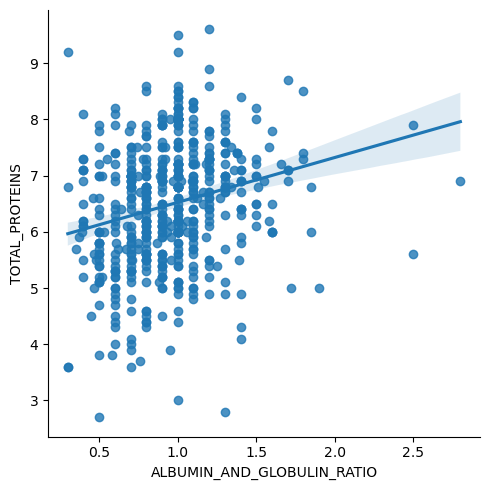

In [28]:
# Creating a scatter plot with regression line using Seaborn's linear model plot
sns.lmplot(x="ALBUMIN_AND_GLOBULIN_RATIO", y="TOTAL_PROTEINS", data=liver_df)
# Displaying the plot
plt.show()

# 6. ALKALINE_PHOSPHOTASE and ALAMINE_AMINOTRANSFERASE

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


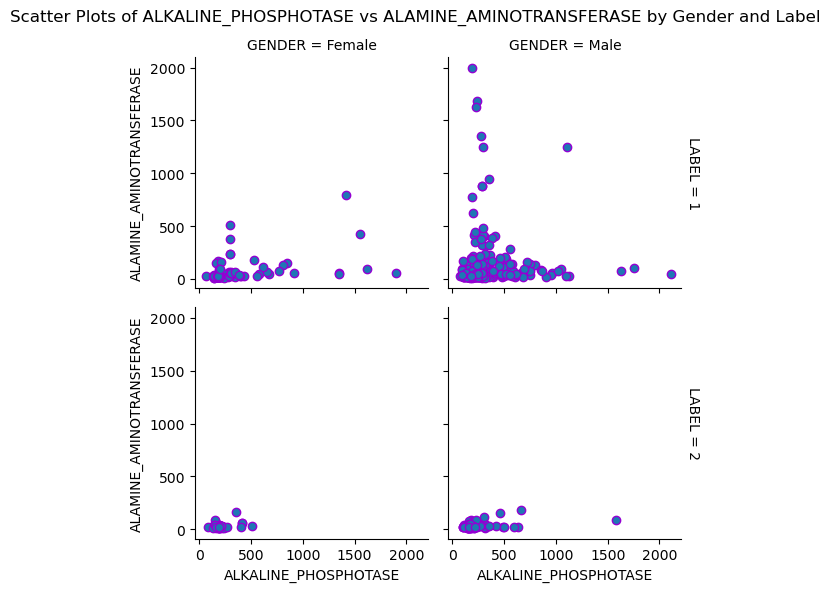

In [29]:
# Creating a FacetGrid
g = sns.FacetGrid(data=liver_df, col="GENDER", row="LABEL", margin_titles=True)
# Mapping scatter plots to each grid element
g.map(plt.scatter, "ALKALINE_PHOSPHOTASE", "ALAMINE_AMINOTRANSFERASE", edgecolor="darkviolet")
# Adjusting the subplot layout
plt.subplots_adjust(top=0.9)
# Title
g.fig.suptitle('Scatter Plots of ALKALINE_PHOSPHOTASE vs ALAMINE_AMINOTRANSFERASE by Gender and Label')
# Displaying the plot
plt.show()

In [30]:
# No correlation between ALKALINE_PHOSPHOTASE and ALAMINE_AMINOTRANSFERASE

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


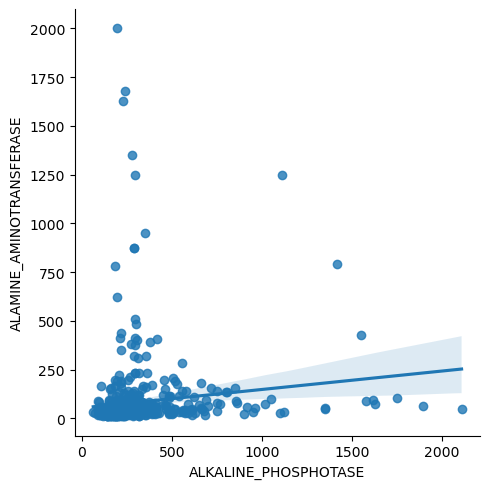

In [31]:
# Creating a scatter plot with regression line using Seaborn's linear model plot
sns.lmplot(x="ALKALINE_PHOSPHOTASE", y="ALAMINE_AMINOTRANSFERASE", data=liver_df)
# Displaying the plot
plt.show()

In [32]:
liver_df

,AGE,GENDER,TOTAL_BILIRUBIN,DIRECT_BILIRUBIN,ALKALINE_PHOSPHOTASE,ALAMINE_AMINOTRANSFERASE,ASPARTATE_AMINOTRANSFERASE,TOTAL_PROTEINS,ALBUMIN,ALBUMIN_AND_GLOBULIN_RATIO,LABEL
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# LOGISTIC REGRESSION

In [33]:
categorical_columns = ['GENDER']
liver_df = pd.get_dummies(liver_df, columns=categorical_columns)
liver_df                                   ?

,AGE,TOTAL_BILIRUBIN,DIRECT_BILIRUBIN,ALKALINE_PHOSPHOTASE,ALAMINE_AMINOTRANSFERASE,ASPARTATE_AMINOTRANSFERASE,TOTAL_PROTEINS,ALBUMIN,ALBUMIN_AND_GLOBULIN_RATIO,LABEL,GENDER_Female,GENDER_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,True,False
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,False,True
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,False,True
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,False,True
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,False,True
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,False,True
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,False,True
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,False,True


In [34]:
# Displays the number of individuals without and with liver disease
liver_df['LABEL'].value_counts()

LABEL
1    416
2    167
Name: count, dtype: int64

In [35]:
import random

indices_to_remove = liver_df[liver_df['LABEL'] == 1].index

# Randomly select 100 indices
indices_to_remove = random.sample(indices_to_remove.tolist(), 240)

# Remove the selected rows
new_df = liver_df.drop(indices_to_remove)

# To resolve the issue of class imbalance
# Some rows have been removed to achieve a more balanced data distribution, which reduces the probablity of misclassification.

In [36]:
new_df['LABEL'].value_counts()

LABEL
1    176
2    167
Name: count, dtype: int64

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

y = new_df['LABEL']
X = new_df.drop('LABEL', axis = 1)

num = ['AGE','TOTAL_BILIRUBIN','DIRECT_BILIRUBIN','ALKALINE_PHOSPHOTASE','ALAMINE_AMINOTRANSFERASE','ASPARTATE_AMINOTRANSFERASE','TOTAL_PROTEINS','ALBUMIN','ALBUMIN_AND_GLOBULIN_RATIO','GENDER_Female','GENDER_Male']

scaler = StandardScaler()
X[num] = scaler.fit_transform(X[num])


In [38]:
X

,AGE,TOTAL_BILIRUBIN,DIRECT_BILIRUBIN,ALKALINE_PHOSPHOTASE,ALAMINE_AMINOTRANSFERASE,ASPARTATE_AMINOTRANSFERASE,TOTAL_PROTEINS,ALBUMIN,ALBUMIN_AND_GLOBULIN_RATIO,GENDER_Female,GENDER_Male
1,1.104596,1.850923,1.823053,1.932904,0.044360,0.024007,0.891721,-0.021172,-0.725466,-0.569495,0.569495
3,0.857045,-0.347538,-0.330849,-0.374710,-0.411742,-0.250128,0.237574,0.229238,0.060649,-0.569495,0.569495
8,-1.680350,-0.369744,-0.373082,-0.285441,-0.338766,-0.253554,0.798272,1.105673,0.665352,-0.569495,0.569495
10,0.795158,-0.436364,-0.457549,-0.249733,-0.074226,-0.116487,-0.603471,-0.647196,-0.544055,-0.569495,0.569495
12,1.228371,-0.369744,-0.373082,0.196614,0.016994,-0.119914,0.424473,0.229238,-0.241703,-0.569495,0.569495
...,...,...,...,...,...,...,...,...,...,...,...
577,-0.752035,2.250643,3.047821,-0.339003,-0.284033,-0.157607,-1.070719,-0.772401,-0.241703,-0.569495,0.569495
578,0.980821,-0.458571,-0.457549,1.044673,-0.357010,-0.202154,-0.603471,-2.024451,-1.844167,-0.569495,0.569495
579,-0.256933,-0.436364,-0.457549,-0.749642,-0.220179,-0.212434,-0.510022,-0.021172,0.363000,-0.569495,0.569495
580,0.485719,-0.391951,-0.415315,-0.093512,-0.101592,-0.150754,-0.136224,-0.021172,0.060649,-0.569495,0.569495


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Creates four sets of data:
# 1. X_train: training features
# 2. X_test: testing features
# 3. y_train: target value in training data
# 4. y_test: target value in testing data

Cleaning - dropping rows with missing values from training and testing dataset

In [49]:
# To drop rows with missing values from training and testing dataset
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [50]:
model = LogisticRegression()
# Creating an instance of LogisticRegression class (Scikit-learn library)
model.fit(X_train, y_train)
# To fit the logistic regression model on the training data.

LogisticRegression()

In [51]:
y_pred = model.predict(X_test)
# To make predictions based on X_test

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6764705882352942

Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.57      0.65        35
           2       0.63      0.79      0.70        33

    accuracy                           0.68        68
   macro avg       0.69      0.68      0.67        68
weighted avg       0.69      0.68      0.67        68


Confusion Matrix:
 [[20 15]
 [ 7 26]]


In [53]:
model.coef_
# The coefficients give information about the impact that each feature has on the predictions

array([[-0.38647506, -0.34604894, -0.7055246 , -0.118895  , -1.30168755,
        -0.66200624, -0.58736544,  0.52769361, -0.21169865,  0.08948964,
        -0.08948964]])

<BarContainer object of 11 artists>

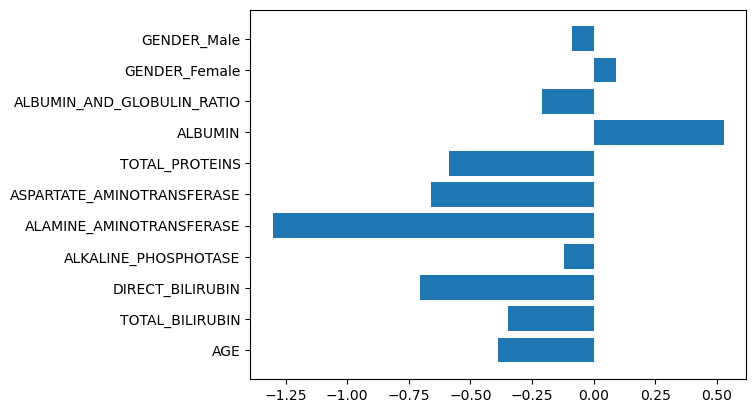

In [54]:
plt.barh(X.columns, model.coef_[0])
# Creates a horizontal bar plot to depict the outcomes